<a href="https://colab.research.google.com/github/parthabathia/LoanStatusPrediction/blob/main/LoanStatusPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
loan_dataset = pd.read_csv('/content/loan.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_dataset.shape

(480, 13)

In [ ]:
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

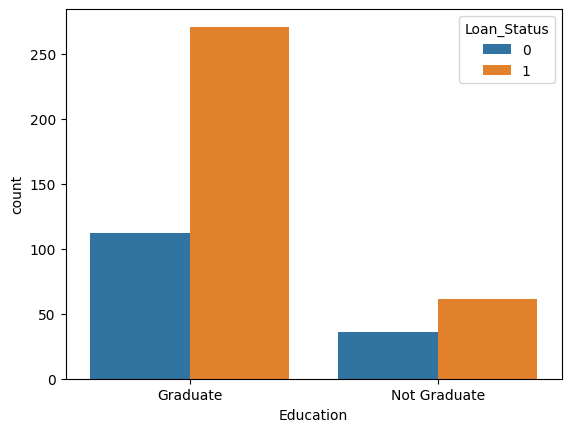

In [ ]:
sns.countplot(data=loan_dataset, x='Education', hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

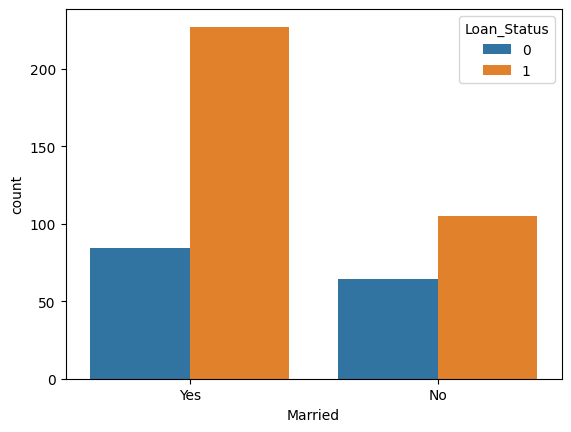

In [ ]:
sns.countplot(data=loan_dataset, x='Married', hue='Loan_Status')

In [ ]:
correlation = loan_dataset.corr()

<ipython-input-76-b5f008769aa1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = loan_dataset.corr()


<Axes: >

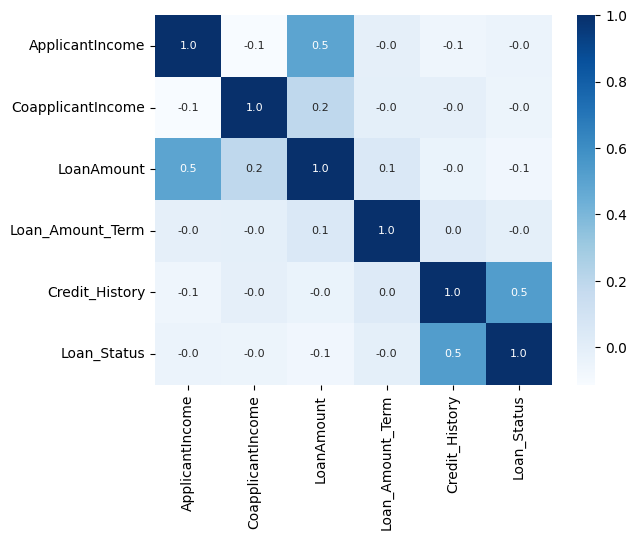

In [ ]:
sns.heatmap(data=correlation, cbar=True, cmap='Blues', fmt='0.1f', annot=True, annot_kws={'size':8})

In [ ]:
loan_dataset.replace({'Married':{'No':0,'Yes':1}}, inplace=True)

In [ ]:
loan_dataset.replace({'Gender':{'Male':1,'Female':0}}, inplace=True)

In [ ]:
loan_dataset.replace({'Self_Employed':{'No':0,'Yes':1}}, inplace=True)

In [ ]:
loan_dataset.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}}, inplace=True)

In [ ]:
loan_dataset.replace({'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<Axes: >

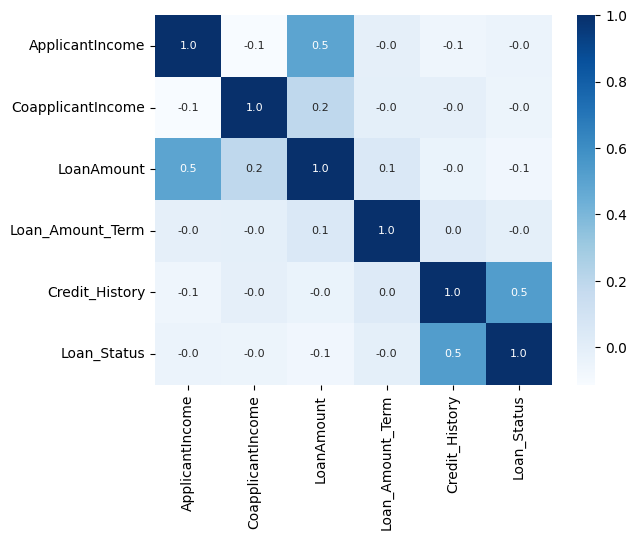

In [ ]:
sns.heatmap(data=correlation, cbar=True, cmap='Blues', fmt='0.1f', annot=True, annot_kws={'size':8})

In [ ]:
X = loan_dataset.drop(columns=['Loan_Status','Loan_ID'], axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
X_train[367:375]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
47,1,1,0,1,0,5821,0.0,144.0,360.0,1.0,2
7,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1
604,0,1,1,1,0,12000,0.0,496.0,360.0,1.0,1
356,1,1,2,1,0,8333,3167.0,165.0,360.0,1.0,0
39,1,0,0,0,0,3748,1668.0,110.0,360.0,1.0,1
499,1,0,0,1,0,6283,4416.0,209.0,360.0,0.0,0
151,1,1,0,1,1,2577,3750.0,152.0,360.0,1.0,0
131,1,0,0,1,0,2014,1929.0,74.0,360.0,1.0,2


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)

In [ ]:
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
X_train_accuracy

0.7986111111111112

In [ ]:
X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
X_test_accuracy

0.8333333333333334

In [ ]:
new_input = X_train[367:375]

In [ ]:
test_prediction = classifier.predict(new_input)
test_accuracy = accuracy_score(test_prediction, Y_train[367:375])

In [ ]:
test_accuracy

1.0

In [ ]:
test_prediction

array([1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
Y_train[367:375]

47     1
7      0
604    1
356    1
39     1
499    0
151    1
131    1
Name: Loan_Status, dtype: int64